# Ordinary differential equations 

### Euler's method and improved Euler's method

EXTRA: Write a computer code to solve the differential equation $y'(x)=y^2+1$ in the region 0 to 1 using Euler's method with $y(0)=0$. Plot or graph your results for h=0.05,0.1,0.15,0.2, along with the exact result

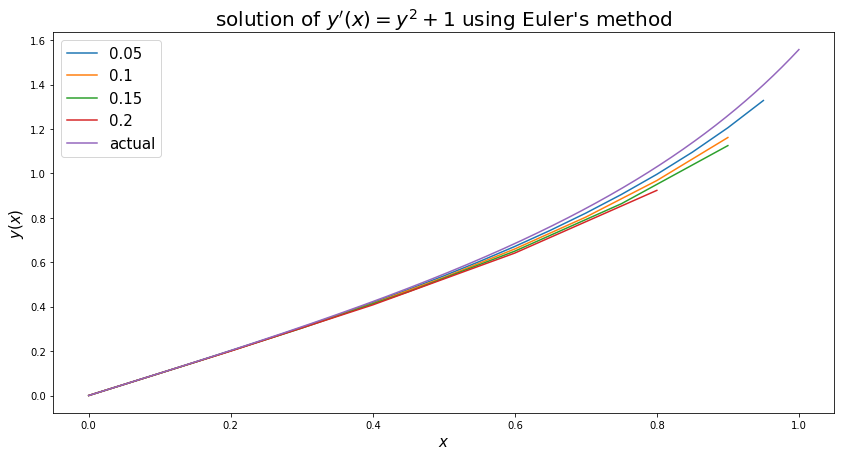

In [2]:
#Solving differential equation using Euler's method

from pylab import *
figure(figsize=(14,7))
title("solution of $y'(x)=y^2+1$ using Euler's method",fontsize=20)
def f(y):
    return (y**2 + 1.0)

x_min = 0.0
x_max = 1.0
hi=[0.05, 0.1, 0.15, 0.2]

for h in hi:
    x = arange(x_min, x_max, h)
    y = zeros(len(x))
    y[0] = 0
    for i in range(len(x)-1):
        y[i+1] = y[i] + h*f(y[i])
    plot(x,y,label = h)

x = linspace(x_min, x_max, 1000)
plot(x,tan(x),label = 'actual')
xlabel('$x$',fontsize = 15)
ylabel('$y(x)$',fontsize = 15)
legend(loc='upper left',fontsize = 15)

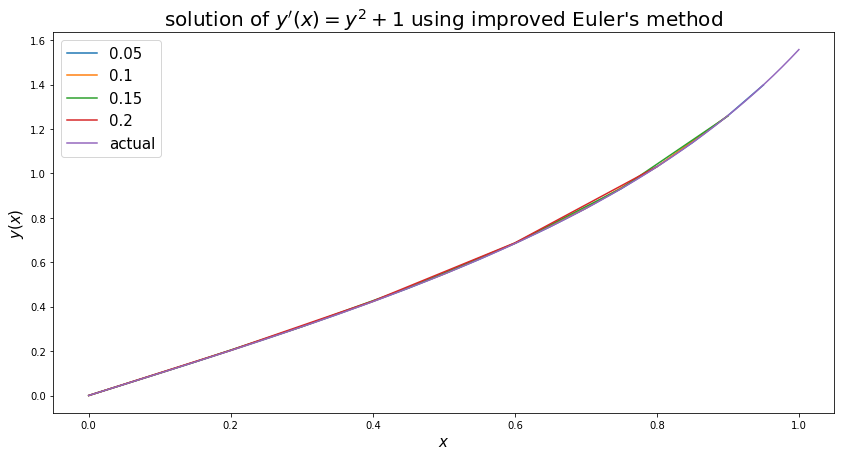

In [3]:
#solving the same differential equation using improved Euler's method

figure(figsize=(14,7))
title("solution of $y'(x)=y^2+1$ using improved Euler's method",fontsize=20)
for h in hi:
    x = arange(x_min, x_max, h)
    y = zeros(len(x))
    y[0] = 0
    for i in range(len(x)-1):
        f_i = f(y[i])
        y[i+1] = y[i] + (h/2.0)*(f_i+f(y[i]+h*f_i))
    plot(x,y,label = h)

x = linspace(x_min, x_max, 1000)
plot(x,tan(x),label = 'actual')
xlabel('$x$',fontsize = 15)
ylabel('$y(x)$',fontsize = 15)
legend(loc='upper left',fontsize = 15)

### RK-4 method

Extra: Solve the following differential equation: $\frac{dp}{dt}=mg-kv^2$,
with $m= 10^{-2}kg, g=9.8 m/s^2, k=10^{-4}kg/m$ and $p=mv$.
Use the fourth order Runge Kutta-method to find v as function of t for $0<t<10$ seconds. Given $v(0) = 0$

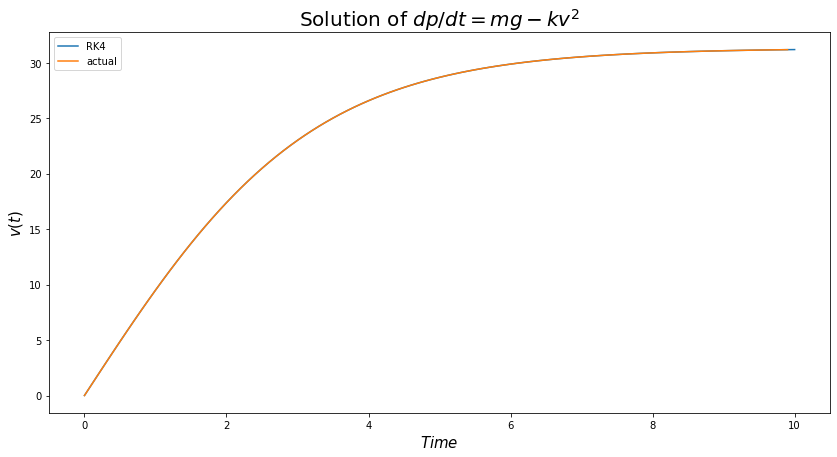

In [4]:
#for first order differential equation

g = 9.8
m = 10**(-2)
k = 10**(-4)

#actual function obtained using mathematica
def actual(x):
    res = zeros(len(x))
    res = sqrt(g*m/k) * tanh(sqrt(g*k/m)*x)
    return res

def f(x,y):
    res = g - k*y*y/m
    return res

def RK4(x0, xm, y0, f, h):
    #x0 (xm): minimum (maximum) value of the independent parameter
    #y0     : initial value of the dependent parameter
    #h      : step size
    
    n  = (int)((xm - x0) / h)
    y  = y0
    x  = []
    y1 = []
    y1.append(y)
    x.append(x0)
    
    for i in range (n):
        k1 = h*f(x0, y)
        k2 = h*f(x0 + h*0.5, y + 0.5*k1)
        k3 = h*f(x0 + h*0.5, y + 0.5*k2)
        k4 = h*f(x0 + h, y + k3)
        
        y  = y  + (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
        x0 = x0 + h
        y1.append(y)
        x.append(x0)
    
    return x,y1

#driver function
ti = 0
tf = 10
vi = 0
h  = 0.1

t,v = RK4(ti, tf, vi, f, h)
x   = arange(ti, tf, h)
a   = actual(x)

#plotting
figure(figsize = (14,7))
title('Solution of $dp/dt=mg-kv^2$',fontsize=20)
plot(t, v, label = 'RK4')
plot(x, a, label = 'actual')
xlabel('$Time$',fontsize=15)
ylabel('$v(t)$',fontsize=15)
legend()

## Calculation of gravitational waves from inspiraling compact binaries

Computing $v$ as a function of $t$ by solving the equation $\frac{dv}{dt}=-\frac{F(v)}{dE(v)/dv}$

Text(0, 0.5, '$v(t)$')

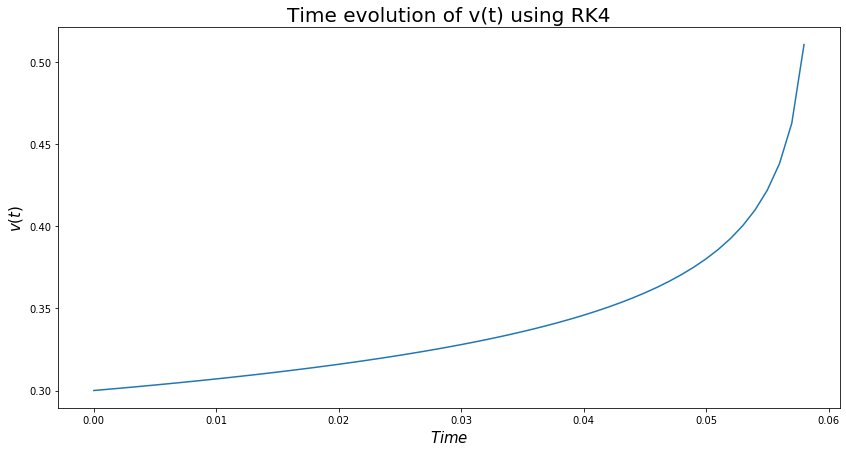

In [5]:
G  = 6.67*(10**(-11))
c3 = 27.0*(10**24)
m0 = 2.0 *(10**30)
m1 = 5.0 * m0 * G/c3
m2 = 5.0 * m0 * G/c3

m  = (m1 + m2)#*G/c3
mu = m1*m2/m#*c3)

def dvdt(t,v):
    return (32.0*mu*(v**9)/(5.0*m*m))

vi = 0.3
ti = 0.0
tf = 0.058
h  = 0.001

t,v = RK4(ti, tf, vi, dvdt, h)

#plotting
figure(figsize = (14,7))
title('Time evolution of v(t) using RK4',fontsize=20)
plot(t, v)
xlabel('$Time$',fontsize=15)
ylabel('$v(t)$',fontsize=15)


Compute $v(t)$ and $\phi (t)$ using the odeint routine and plot the result. Given $\frac{d\phi}{dt} = \frac{v^3}{m}$

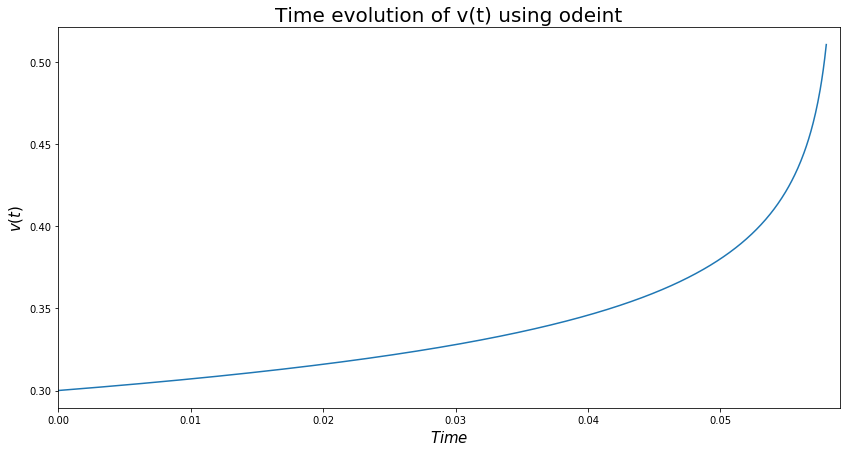

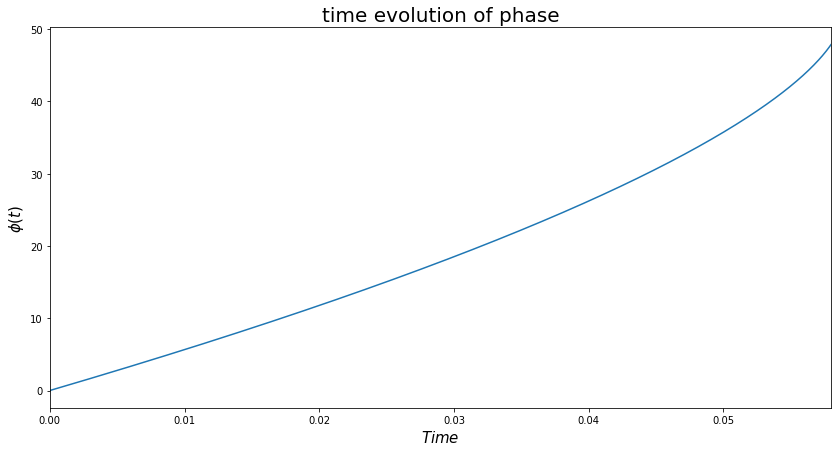

In [6]:
#using odeint function
from scipy.integrate import odeint

def fn(v,t):             #defning the function to compute dv/dt and dphi/dt
    v1 = v[0]
    dv_dt = (32.0 * (v1**9) * mu) / (5.0 * ((m1 + m2)**2.0))
    dphi_dt = (v1**3) / (m1 + m2)
    derivative = [dv_dt,dphi_dt]
    return derivative

phi0 = 0.0
initial = [vi,phi0]
N = 1001
t = linspace(ti, tf, N)

soln = odeint(fn, initial, t)   #calling the function using odeint

velocity=soln[:,0]
phase=soln[:,1]  

#plotting the velocity
figure(figsize = (14,7))
title('Time evolution of v(t) using odeint',fontsize = 20)
plot(t,soln[:,0])
xlabel('$Time$',fontsize = 15)
ylabel('$v(t)$',fontsize = 15)      
xlim(0,0.059)
show()
#plotting the phase
figure(figsize=(14,7))
title('time evolution of phase',fontsize = 20)    
plot(t,soln[:,1])
xlabel('$Time$',fontsize = 15)
ylabel('$\phi (t)$',fontsize = 15)
xlim(0,0.058)
show()

Compute and plot the two gravitational wave polarizations

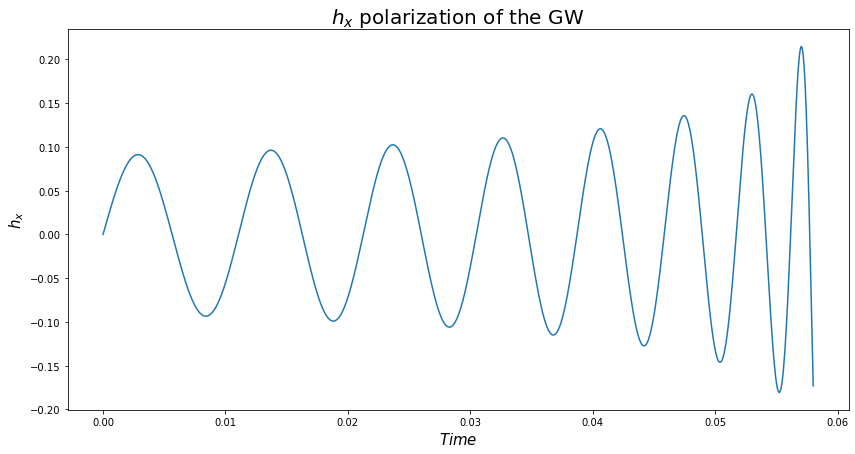

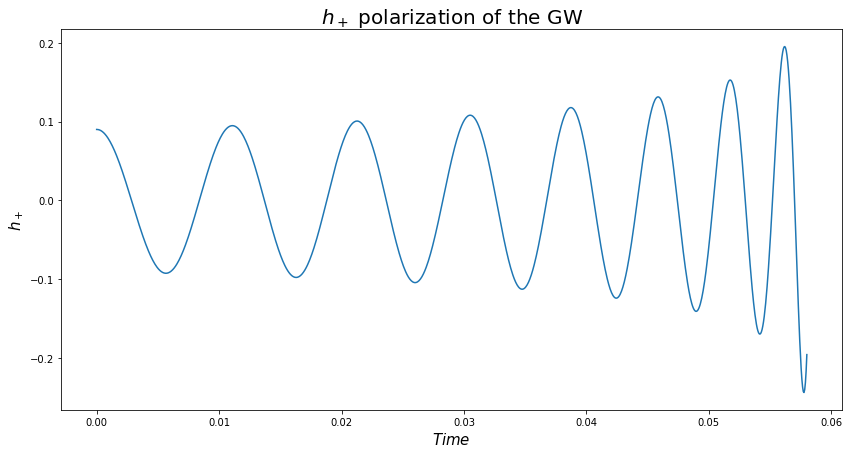

In [7]:
k = 4.0*mu*(velocity**2)/m
h_cross = k*sin(phase)
h_plus  = k*cos(phase)

#plotting h-cross polarization
figure(figsize = (14,7))
plot(t, h_cross)
xlabel('$Time$',fontsize = 15)              
ylabel('$h_x$',fontsize = 15)
title('$h_x$ polarization of the GW',fontsize=20)
show()

#plotting h-plus polarization
figure(figsize = (14,7))
plot(t, h_plus)
xlabel('$Time$',fontsize = 15)              
ylabel('$h_+$',fontsize = 15)
title('$h_+$ polarization of the GW',fontsize=20)
show()


###  Runge-Kutta-Fehlberg method

This function approximates the solution of the IVP: $ y'=f(t,y)$, $a\leq t\leq b$, $y(a)=\alpha$

In [8]:
def RKF(a, b, alpha, TOL, hmax, hmin, f):
    
    #a,b   = endpoints
    #alpha = initial condition
    #TOL   = tolerance
    #hmax  = maximum step size
    #hmin  = minimum step size
    
    t    = a
    w    = alpha
    h    = hmax
    FLAG = 1
    
    t1 = []
    y  = []
    
    while(FLAG == 1):
        
        K1 = h * f(t, w)
        K2 = h * f(t + (1/4)*h, w + (1/4)*K1)
        K3 = h * f(t + (3/8)*h, w + (3/32)*K1 + (9/32)*K2)
        K4 = h * f(t + (12/13)*h, w + (1932/2197)*K1 - (7200/2197)*K2 + (7296/2197)*K3)
        K5 = h * f(t + h, w + (439/216)*K1 - 8*K2 + (3680/513)*K3 - (845/4104)*K4)
        K6 = h * f(t + 0.5*h, w - (8/27)*K1 + 2*K2 - (3544/2565)*K3 + (1859/4104)*K4 - (11/40)*K5)
        
        R  = abs((1/360)*K1 - (128/4275)*K3 - (2197/75240)*K4 + (1/50)*K5 + (2/55)*K6)/h
        
        if (R <= TOL):
            t = t + h #approximation accepted
            w = w + (25/216)*K1 + (1408/2565)*K3 + (2197/4104)*K4 - (1/5)*K5
            t1.append(t)
            y.append(w)
            
        delta = 0.84*pow(TOL/R,0.25)
        
        #calculate new h
        if (delta <= 0.1):
            h = 0.1*h
        elif (delta >= 4):
            h = 4.0*h
        else:
            h = delta*h
            
        if(h > hmax):
            h = hmax
            
        if(t >= b):
            FLAG = 0
        elif(t+h > b):
            h = b - t
        elif(h < hmin):
            FLAG = 0
            print('minimum h exceeded')
            break
    return t1, y, h

EXTRA: Use the RKF method with TOL = $10^{-5}$, $h_{max}=0.25$ and $h_{min} = 0.01$ to approximate:
$$y'=y-t^2+1,$$ $0\leq t\leq2$, $y(0)=0.5$ and compare the results with the exact solution $y(t)=(t+1)^2-0.5\cdot e^t$.

0.08266720063079269


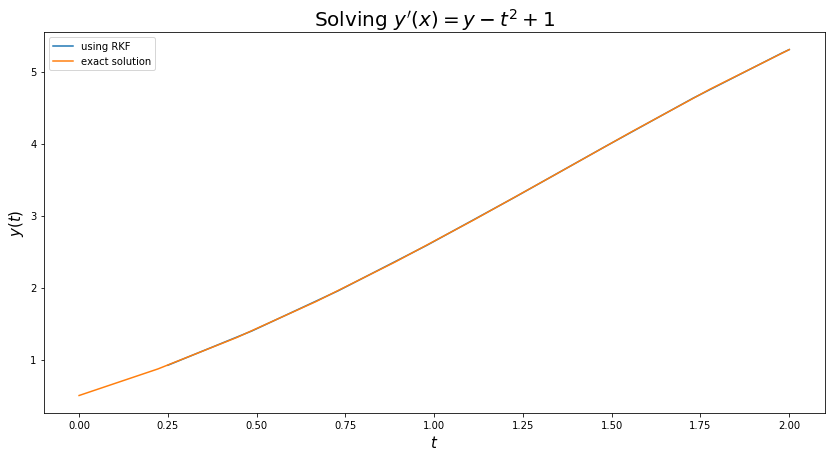

In [9]:
def dy(t,y):
    return (y-(t**2)+1)
t, w, h = RKF(0.0, 2.0, 0.5, 10**(-5), 0.25, 0.01, dy)
x = linspace(0,2,10)
f = ((x+1)**2)-0.5*exp(x)
print(h)

figure(figsize = (14,7))
title("Solving $y'(x) = y-t^2+1$",fontsize=20)
plot(t,w,label = 'using RKF')
plot(x,f,label = 'exact solution')
xlabel('$t$',fontsize=15)
ylabel('$y(t)$',fontsize=15)
legend()



Using RKF to plot the time evolution of v(t)

9.952879692618284e-05


Text(0, 0.5, '$v(t)$')

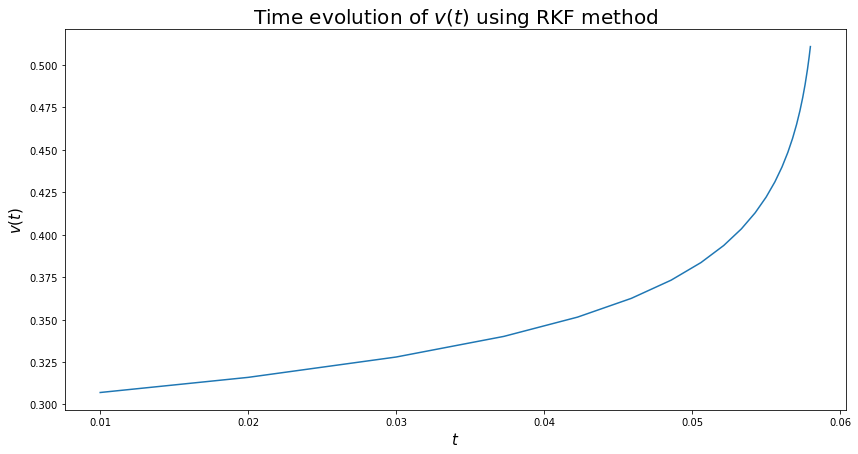

In [10]:
t,v,h = RKF(0.0,0.058,0.3,10**(-5),0.01,0.0001,dvdt)
print(h)
figure(figsize = (14,7))
title("Time evolution of $v(t)$ using RKF method",fontsize=20)
plot(t,v)
xlabel('$t$',fontsize=15)
ylabel('$v(t)$',fontsize=15)


### Using Scipy.integrate.ode which uses adaptive runge kutta method to compute the velocity and phase

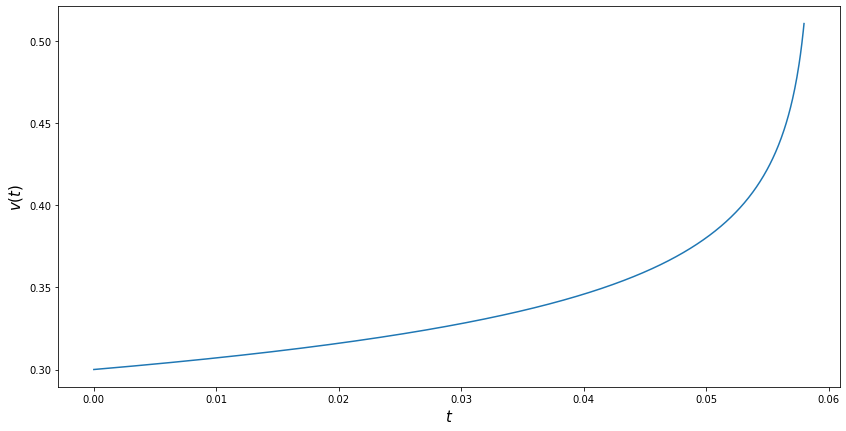

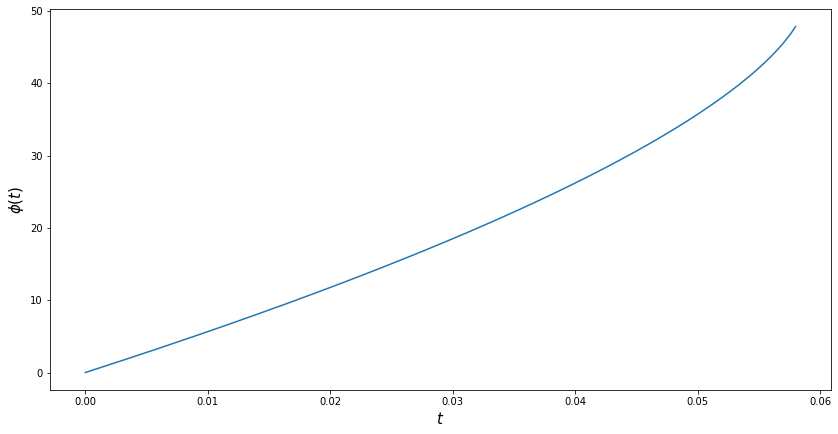

In [12]:
from scipy.integrate import ode
def fun2(t, v, m1_, m2_):             #defning the function dv/dt which is required for scipy.integrate
    v1     = v[0]
    G      = 6.67*(10**(-11))
    c      = 3*(10**8)
    ms     = 2*(10**30)
    k      = G/(c**3)
    m1     = m1_*ms*k
    m2     = m2_*ms*k
    u      = m1*m2 / (m1+m2)
    dv_dt  =(32*(v1**9)*u)/(5*((m1+m2)**2))
    dphi_dt=(v1**3)/(m1+m2)
    return [dv_dt,dphi_dt]           #returns both deivative of speed and phase

m1 = 5.0
m2 = 5.0
solver = ode(fun2)
solver.set_integrator('dopri5')
solver.set_f_params(m1,m2)

t0      = 0.0
initial = [0.3,0]
solver.set_initial_value(initial, t0)

# Create the array `t` of time values at which to compute
# the solution, and create an array to hold the solution.
# Put the initial value in the solution array.
t1    = 0.058
N     = 1001
time  = linspace(t0, t1, N)
sol   = empty((N, 2))
sol[0]= initial
t     = linspace(t0, t1, N)

# Repeatedly call the `integrate` method to advance the
# solution to time t[k], and save the solution in sol[k].
k = 1
while solver.successful() and solver.t < t1:
    solver.integrate(time[k])
    sol[k] = solver.y
    k = k + 1

    
#Plot the solution...
figure(figsize = (14,7))
plot(t, sol[:,0])
xlabel('$t$', fontsize = 15)
ylabel('$v(t)$', fontsize = 15)
figure(figsize = (14,7))
plot(t, sol[:,1])
xlabel('$t$', fontsize = 15)
ylabel('$\phi(t)$', fontsize = 15)
show()